# Intro To Clustering

Groups with similar characteristics
* Rich and loyal
* Generous spending habits

Segmentation: Clustering
Separate, fully covering segments

In clustering the data is unlabeled

## Application
* Retail
    * Identifying buying patterns
    * Recommending
* Banking
    * Fraud detection in credit card use
    * Identify clusters of customers (loyal, rich)
* Insurance
    * Fraud detection in claims analysis
* Publication
    * Auto categorizing
    * Recommending
* Medicine
    * Characterizing patient behavior
* Biology
    * Clustering geneticist markers to identify family ties

Summary generation
Outlier detection
Finding duplicates

## K-means clustering
kit divides the data into non-overlapping subsets without any cluster-internal structure

In cluster = similar
across different clusters are very different

Similarity metrics -> distance 
Try many centroid positions

## k-Means accuracy
* External approach:
Compare the clustesr with the ground truth if it is available

* Internal approach:
Average the distance between data points within a cluster

## Choosing $k$

Chose the 'elbow point'. 

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

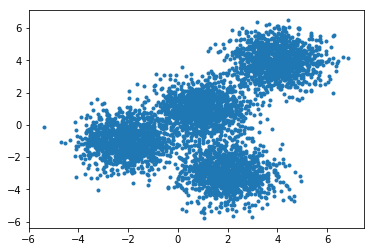

In [9]:
np.random.seed(0)
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [13]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(X)

k_means_labels = k_means.labels_
k_means_labels

array([3, 2, 2, ..., 1, 3, 3], dtype=int32)

In [14]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 0.96900523,  0.98370298],
       [ 3.97334234,  3.98758687],
       [ 1.99741008, -3.01666822],
       [-2.03743147, -0.99782524]])

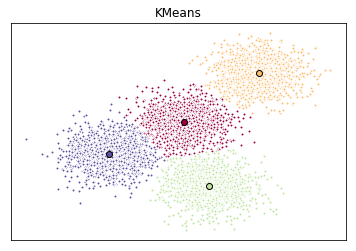

In [15]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

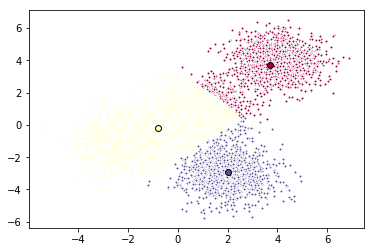

In [17]:
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()
